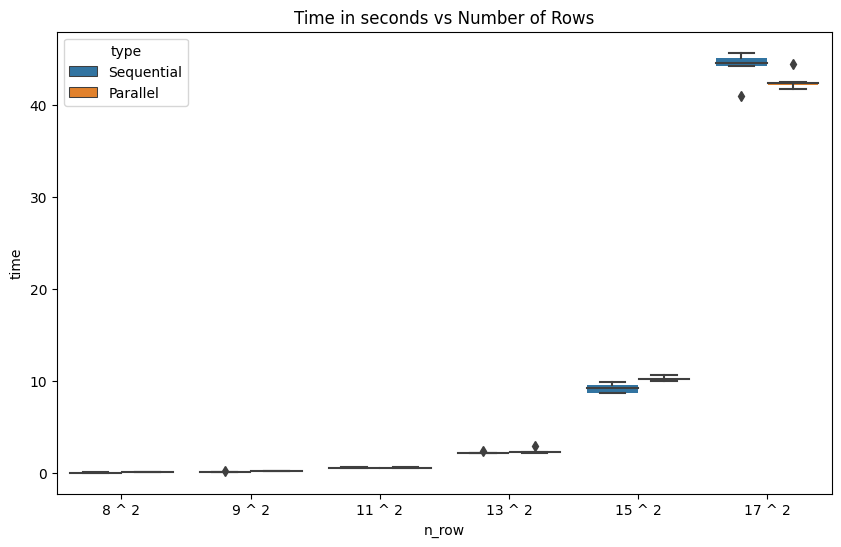

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
seq_df = pd.read_csv('seq_time.csv', names=['n_row', 'time'])
par_df = pd.read_csv('par_time.csv', names=['n_row', 'time'])


# Add a new column to each DataFrame to indicate the type of the data
seq_df['type'] = 'Sequential'
par_df['type'] = 'Parallel'

# Concatenate the two DataFrames
df = pd.concat([seq_df, par_df])

df['n_row'] = np.log2(df['n_row']).astype(int).astype(str) + ' ^ 2'
df['time'] = df['time'] / 1000


plt.figure(figsize=(10, 6))
sns.boxplot(x='n_row', y='time', hue='type', data=df,  showmeans=False, 
            meanline=False,
            meanprops={'color':'red', 'linewidth':0}, boxprops={'linewidth': 0})
plt.title('Time in seconds vs Number of Rows')
plt.show()

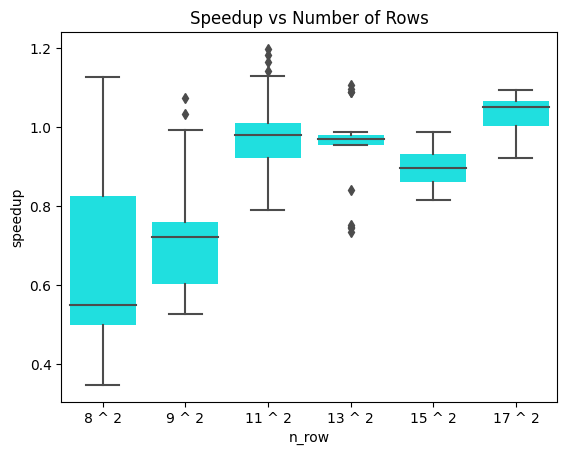

In [49]:
seq_df = pd.read_csv('seq_time.csv', names=['n_row', 'time'])
par_df = pd.read_csv('par_time.csv', names=['n_row', 'time'])
merged = seq_df.merge(par_df, on='n_row', suffixes=('_seq', '_par'))

merged['speedup'] = merged['time_seq'] / merged['time_par']
merged['n_row'] = np.log2(merged['n_row']).astype(int).astype(str) + ' ^ 2'

sns.boxplot(x='n_row', y='speedup', data=merged, color='cyan', boxprops={'linewidth': 0})

plt.title('Speedup vs Number of Rows')
plt.show()
